<a href="https://colab.research.google.com/github/SunilRajput1606/Data-cleaning/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [6]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [10]:
df[cat_col].nunique()

,0
Name,891
Sex,2
Ticket,681
Cabin,147
Embarked,3


In [11]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [12]:
df1 = df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

In [13]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Fare,0.00
Cabin,77.10
Embarked,0.22


In [14]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

In [15]:
# Mean imputation
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again
df3.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


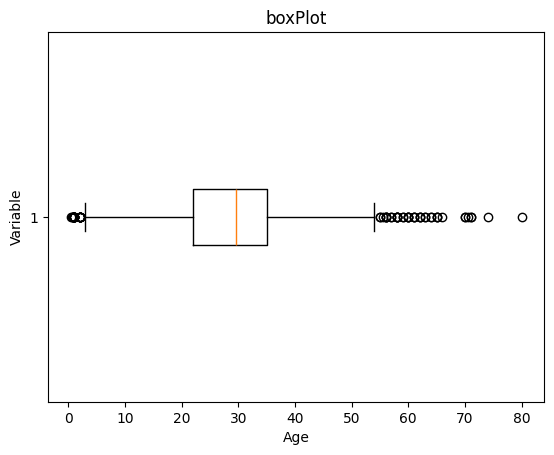

In [29]:
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('boxPlot')
plt.show()

In [17]:
# calculate summary statistics
mean = df3['Age'].mean()
std  = df3['Age'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound)
                & (df3['Age'] <= upper_bound)]

Lower Bound : 3.705400107925648
Upper Bound : 55.578785285332785


In [18]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

In [19]:
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

/tmp/ipython-input-1402675863.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S
